In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

In [2]:
# Importing dataset
df=pd.read_csv('dataset w7.csv')
df

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


In [3]:
df.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [4]:
# Checking for null values
df.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

Text(0.5, 1.0, 'Average marks of male and female students')

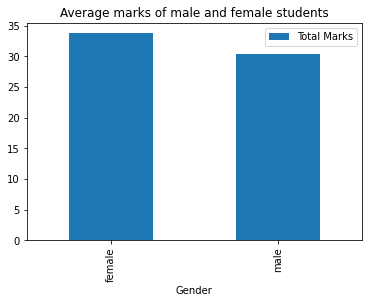

In [5]:
# Average marks of male and female students
data1=df[['Gender','Total Marks']].groupby('Gender').mean()
data1.plot(kind='bar')
plt.title('Average marks of male and female students')

In [6]:
data2=df.groupby(['Gender','Test preparation'])[['Total Marks']].mean()
data2

Total Marks
Gender Test preparation             
female completed           45.250000
       none                29.916667
male   completed           43.666667
       none                26.000000

Text(0.5, 1.0, 'Average marks of each category of students')

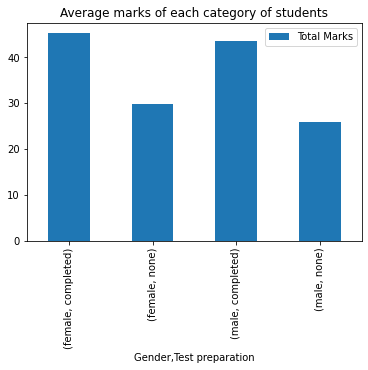

In [7]:
data2.plot(kind='bar')
plt.title('Average marks of each category of students')

### Whether female and male students scored the same marks

Here the hypotheses are

H0 : Male and female students have scored similar marks. 

H1 : Male and female students have significant difference in their marks.

In [8]:
# Seperating data of male and female students.
f=df[df['Gender']=='female'][['Total Marks']]           # Data of female students
m=df[df['Gender']=='male'][['Total Marks']]             # Data of male students

In [9]:
statistic,p_val=ttest_ind(f,m)
print('t score=',statistic,'\np value=',p_val,'\n')

alpha  = 0.05
if p_val>alpha:
    print("We fail to reject H0 based on the sample. The male and female students have scored similar marks.")
else:
    print("There is enough evidence to reject H0 based on the sample. The male and female students have significant difference in their marks.")

t score= [0.69408853] 
p value= [0.49378223] 

We fail to reject H0 based on the sample. The male and female students have scored similar marks.


### Whether test preparation helps the students

Here the hypotheses are

H0 :Test preparation has not affected the marks of students. 

H1 : The test preparation has helped increase the marks of students.

In [10]:
# Seperating data of students who attended the test preparation course and those who didnot.
prep=df[df['Test preparation']=='completed'][['Total Marks']]
no_prep=df[df['Test preparation']=='none'][['Total Marks']]

In [11]:
statistic,p_val=ttest_ind(prep,no_prep,alternative='greater')
print('t score=',statistic,'\np value=',p_val,'\n')

alpha  = 0.05
if p_val>alpha:
    print("We fail to reject H0 based on the sample. There is no significant difference in marks of students who attended the test preparation course and those who didnot.")
else:
    print("There is enough evidence to reject H0 based on the sample. The test preparation has helped the students significantly. ")

t score= [3.61436375] 
p value= [0.00063356] 

There is enough evidence to reject H0 based on the sample. The test preparation has helped the students significantly. 
